### Problem 3 ###

In [315]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate


def create_gram(N):
    phi = lambda z: np.exp(-z**2)
    gram_matrix = np.zeros((N,N))    
    
    for i in range(N):
        for j in range(N):
            matrix_elem = lambda z: phi(N*z - (i+1) + 0.5)*phi(N*z - (j+1) + 0.5)
            gram_matrix[i][j] = integrate.quad(matrix_elem, -np.inf, np.inf)[0]
            
    return gram_matrix
            
def plot_basis(N, n):
    G = create_gram(N)
    H = np.linalg.inv(G)
    
    x = np.arange(0,1,0.001)
    y = np.zeros(len(x))
    
    for t in range(len(y)):
        y[t] = dual_basis(N, n, x[t], H)
    
    plt.plot(x, y)
    plt.show()
    
def dual_basis(N, n, t, H):
    phi = lambda x: np.exp(-x**2)
    
    dual_basis = 0
    
    for l in range(N):
        temp_phi = phi((N*t) -(l+1) + 0.5)
        dual_basis += (H[n][l])*temp_phi
    
    return dual_basis

def plot_kernel(N, tau):
    phi = lambda x: np.exp(-x**2)
    G = create_gram(N)
    H = np.linalg.inv(G)
    
    x = np.arange(0,1,0.001)
    y = np.zeros(len(x))
    
    for t in range(len(y)):
        for n in range(N):
            y[t] += phi((N*tau) -(n+1) + 0.5)*dual_basis(N, n, x[t], H)
    
    plt.plot(x, y)
    plt.show()

def plot_kernel_2d(N):
    phi = lambda x: np.exp(-x**2)
    G = create_gram(N)
    H = np.linalg.inv(G)
    
    x = np.arange(0,1,0.005)
    tau = np.arange(0,1, 0.005)
    y = np.zeros((len(x), len(tau)))
    
    for t in range(len(y)):
        for j in range(len(tau)):
            for n in range(N):
                y[t][j] += phi((N*tau[j]) -(n+1) + 0.5)*dual_basis(N, n, x[t], H)
    
    plt.imshow(y)
    plt.show()
    
    
def compare_functions(N, t0, t1):
    phi = lambda x: np.exp(-x**2)
    G = create_gram(N)
    H = np.linalg.inv(G)
    alphas = np.random.rand(N)*100
    
    x = np.arange(t0, t1, 0.001)
    y_kernel = np.zeros(len(x))
    y_regular = np.zeros(len(x))
    
    for t in range(len(x)):
        temp = np.matmul(np.transpose(alphas), np.transpose(G))
        y_kernel[t] = np.matmul(temp, np.array([dual_basis(N, n, x[t], H) for n in range(N)]))
        y_regular[t] = sum([alphas[i]*phi(N*x[t] - (i+1) + 0.5) for i in range(N)])
    
    print("Sum Squared Difference Between <f, K> and f(t) = {}".format(sum(y_kernel - y_regular)))
    print("The difference is negligible and due to rounding error which shows that <f, K> = f(t)")
    plt.plot(x, y_kernel, label="<f, K>")
    plt.plot(x, y_regular, label="f(t)")
    plt.legend()


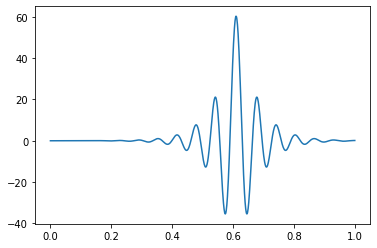

In [292]:
plot_basis(32, 19)

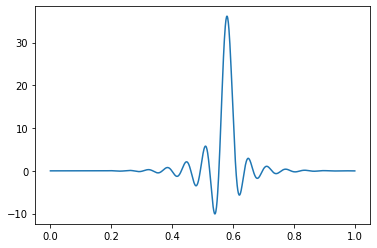

In [267]:
plot_kernel(32, .581723)

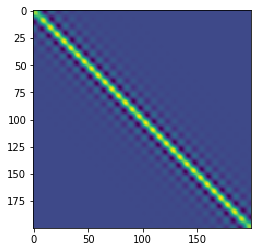

In [277]:
plot_kernel_2d(32)

Sum Squared Difference Between <f, K> and f(t) = -2.4993340730361524e-12
The difference is negligible and due to rounding error which shows that <f, K> = f(t)


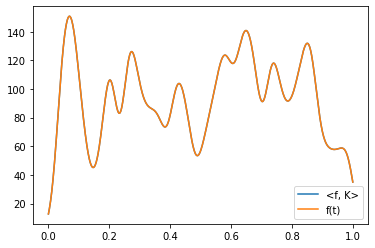

In [316]:
compare_functions(32, 0, 1)

### Problem 4 ###

In [170]:
import scipy.io

mat = scipy.io.loadmat('hw4p4.mat')

u_data = mat['udata']

y_data = mat['ydata']


In [171]:
def generate_A_matrix(u_data):
    basis = [lambda s,t: s**2, lambda s,t: t**2, lambda s,t: s*t, lambda s,t: s, lambda s,t: t, lambda s,t: 1]
    
    
    A = np.zeros((100,6))
    
    for i in range(100):
        for j in range(6):
            A[i][j] = basis[j](u_data[0][i], u_data[1][i])
            
    return A

In [226]:
def solve_least_squares(u_data, y_data):
    A = generate_A_matrix(u_data)
    A_t = np.transpose(A)
    
    A_t_A_inv = np.linalg.inv(np.matmul(A_t, A))
    
    alphas = np.matmul(np.matmul(A_t_A_inv, A_t), y_data)
    
    return alphas
    
alphas = solve_least_squares(u_data, y_data)

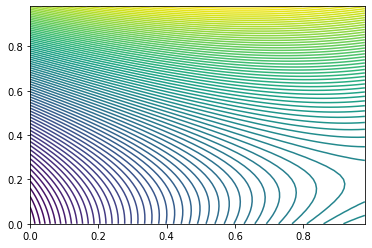

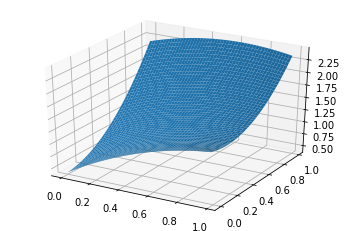

In [259]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_3d(alphas):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    X = np.arange(0,1,0.02)
    Y = np.arange(0,1,0.02)
    
    X, Y = np.meshgrid(X, Y)
    
    Z = alphas[0]*X**2 + alphas[1]*Y**2 + alphas[2]*X*Y + alphas[3]*X + alphas[4]*Y + alphas[5]
    
    surface = ax.plot_surface(X, Y, Z)
        
    plt.show()

def contour_plot(alphas):
    X = np.arange(0,1,0.02)
    Y = np.arange(0,1,0.02)
    
    X, Y = np.meshgrid(X, Y)
    
    Z = alphas[0]*X**2 + alphas[1]*Y**2 + alphas[2]*X*Y + alphas[3]*X + alphas[4]*Y + alphas[5]
    
    plt.contour(X, Y, Z, 100)
        
    plt.show()
    
contour_plot(alphas)
plot_3d(alphas)

### Problem 5 ###

In [287]:
def generate_Q_matrix():
    G = np.matrix([[lambda s: 2*s, lambda s: 0, lambda s: s, 
                    lambda s: 1, lambda s: 0, lambda s: 0], 
                   [lambda s: 0, lambda s: 2*s, lambda s: s, 
                    lambda s: 0, lambda s: 1, lambda s: 0]])
    
    G_t = np.transpose(G)
    
    Q = np.zeros((6,6))
    
    for i in range(6):
        for j in range(6):
            Q[i][j] = integrate.quad(lambda x: G_t[i,0](x)*G[0,j](x), 0, 1)[0] + integrate.quad(lambda x: G_t[i,1](x)*G[1,j](x), 0, 1)[0]
    
    return Q

def gradient_ridge_regression(xs, ys, delta):
    A = generate_A_matrix(xs)
    #Q = generate_Q_matrix() didn't work for some reason
    Q = np.matrix([[4/3, 0, 1/2, 1, 0, 0],
                   [0, 4/3, 1/2, 0, 1, 0],
                   [1/2, 1/2, 2/3, 1/2, 1/2, 0],
                   [1, 0, 1/2, 1, 0, 0],
                   [0, 1, 1/2, 0, 1, 0],
                   [0, 0, 0, 0, 0, 0]])
    At_A = np.matmul(np.transpose(A), A)
    
    At_A_reg = At_A + (delta*Q)
    
    At_A_reg_inv = np.linalg.inv(At_A_reg)
    
    x_hat = np.matmul(np.matmul(At_A_reg_inv, np.transpose(A)), ys)
    
    return x_hat

def compare_deltas(d1, d2, d3):
    x_hat1 = gradient_ridge_regression(u_data, y_data, d1)
    x_hat2 = gradient_ridge_regression(u_data, y_data, d2)
    x_hat3 = gradient_ridge_regression(u_data, y_data, d3)
    
    print(np.transpose(x_hat1))
    print(np.transpose(x_hat2))
    print(np.transpose(x_hat3))
    
compare_deltas(0.0, 100, 1e10)

[[-0.73573501  1.63867697 -0.84709546  1.73763534  0.19875315  0.4002314 ]]
[[-0.00792692  0.02239166 -0.02196933  0.03905214  0.09287977  1.42619438]]
[[-8.17250335e-11  2.22231080e-10 -2.18556161e-10  3.89880318e-10
   1.01954457e-09  1.49173749e+00]]
